# Clustering

In [1]:
# 연습용 데이터 생성 함수 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# x, y 를 반환함. 
x, y = make_blobs(random_state=10)

# 시각화를 통해 다음과 같이 할당되어 있다고 가정
plt.scatter(x[:,0], x[:, 1])

In [2]:
y

array([2, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0])

In [3]:
p1 = [5.683397508810986, 5.055340128019022]
p2 = [6.68000164584778, -5.1538014055317571]
p3 = [-1.3177517986543703, -4.979922671990228]

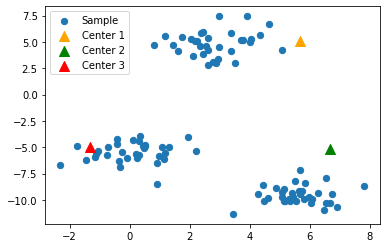

In [4]:
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c1')

In [5]:
import numpy as np
import pandas as pd
dist = pd.DataFrame(x)
dist['c1'] = np.sqrt(np.power(x[:, 0] - p1[0], 2) + np.power(x[:, 1] - p1[1], 2))
dist['c2'] = np.sqrt(np.power(x[:, 0] - p2[0], 2) + np.power(x[:, 1] - p2[1], 2))
dist['c3'] = np.sqrt(np.power(x[:, 0] - p3[0], 2) + np.power(x[:, 1] - p3[1], 2))
dist

,0,1,c1,c2,c3
0,-2.324963,-6.699996,14.223986,9.136745,1.993271
1,0.518568,-4.900868,11.216129,6.166623,1.838021
2,2.443018,3.846526,3.458510,9.947760,9.594248
3,5.826623,-9.922593,14.978618,4.844547,8.687467
4,2.033002,5.289908,3.657924,11.430909,10.802638
...,...,...,...,...,...
95,-0.736931,-4.957402,11.894353,7.419533,0.581257
96,2.790440,3.068621,3.509452,9.095983,9.036387
97,4.486980,-10.074298,15.176870,5.387080,7.723184
98,6.268638,-9.381380,14.448578,4.247546,8.770754


In [6]:
dist['round1'] = dist.loc[:, 'c1':'c3'].values.argmin(axis=1)
dist

,0,1,c1,c2,c3,round1
0,-2.324963,-6.699996,14.223986,9.136745,1.993271,2
1,0.518568,-4.900868,11.216129,6.166623,1.838021,2
2,2.443018,3.846526,3.458510,9.947760,9.594248,0
3,5.826623,-9.922593,14.978618,4.844547,8.687467,1
4,2.033002,5.289908,3.657924,11.430909,10.802638,0
...,...,...,...,...,...,...
95,-0.736931,-4.957402,11.894353,7.419533,0.581257,2
96,2.790440,3.068621,3.509452,9.095983,9.036387,0
97,4.486980,-10.074298,15.176870,5.387080,7.723184,1
98,6.268638,-9.381380,14.448578,4.247546,8.770754,1


0    2.840507
1    4.858404
dtype: float64
0    5.618347
1   -9.542885
dtype: float64
0    0.089212
1   -5.464417
dtype: float64


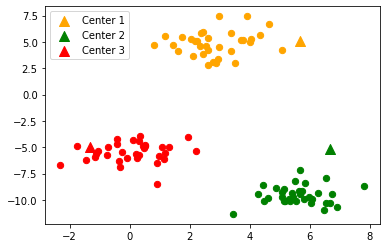

In [7]:
color = ['orange', 'green', 'red']
for cls in range(3):
    subset = dist.loc[dist['round1']==cls, [0, 1]]
    plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], s=40, c=color[cls])
    print(subset.mean())
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c2')

In [8]:
p1 = [2.840507, 4.858404]
p2 = [5.618347, -9.542885]
p3 = [0.089212,  -5.464417]

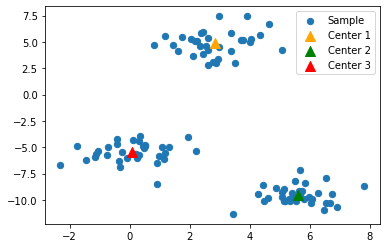

In [9]:
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')
plt.scatter(p1[0], p1[1], s=100, label='Center 1', c='orange', marker='^')
plt.scatter(p2[0], p2[1], s=100, label='Center 2', c='green', marker='^')
plt.scatter(p3[0], p3[1], s=100, label='Center 3', c='red', marker='^')
plt.legend()
plt.savefig('c3')

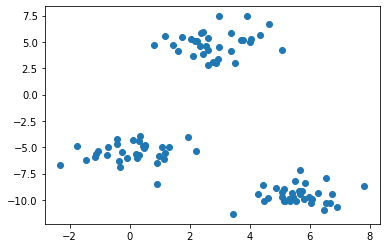

In [10]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
x, y = make_blobs(random_state=10)
plt.scatter(x[:,0], x[:, 1])

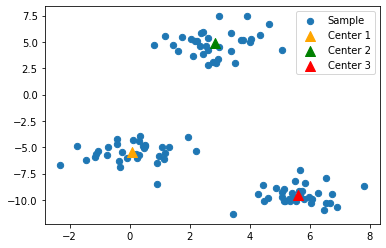

In [11]:
from sklearn.cluster import KMeans
color = ['orange', 'green', 'red']

# n_clusters = K
K = KMeans(n_clusters=3).fit(x)
plt.scatter(x[:,0], x[:, 1], s=40, label='Sample')

centers = K.cluster_centers_

for idx, center in enumerate(centers):
    plt.scatter(center[0], center[1], s=100, 
                label=f'Center {idx+1}', c=color[idx], marker='^')
plt.legend()
plt.show()

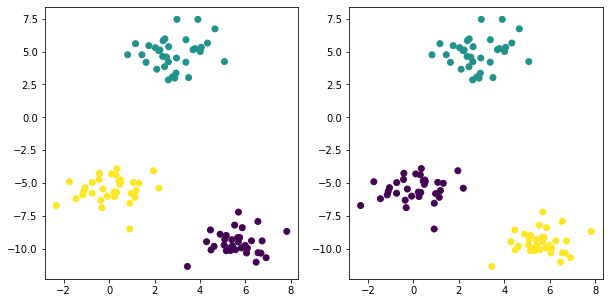

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1], c=y) # 실제 같은 label 끼리 같은 색상으로 표현 
plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 1], c=K.predict(x)) # 같은 군집끼리 같은 색상으로 표현

In [13]:
# 군집번호는 랜덤하게 지정되기 때문에 라벨끼리 비교 불가 
from sklearn.metrics import accuracy_score
accuracy_score(y, K.predict(x)) # 군집의 순서가 label과 일치하지 않는 문제 발생

0.33

In [14]:
from sklearn.metrics import accuracy_score as ACC 
# y가 있는 경우 군집 정확도 평가 가능
from sklearn.metrics.cluster import adjusted_mutual_info_score as ARI   # cross-entropy
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI  # 변경하면서 비교

print('ACC' , ACC(y, K.predict(x))) # 군집의 순서(번호)가 실제 Label과 일치하지 않다. 
print('ARI' , ARI(y, K.predict(x))) # 
print('NMI' , NMI(y, K.predict(x)))

ACC 0.33
ARI 1.0
NMI 1.0


In [15]:
# 실제는 y값이 없으므로, 군집이 잘 됐는지 이너셔를 통해 확인. 군집이 얼마나 잘 만들어졌는가 확인한다. 
# 실루엣 계수를 사용하기도 한다. 실루엣 계수가 항상 올바르진 않다. 
# inertia에 따라 K를 찾아가기도 한다
# inertia 값이 낮을 수록 좋다 (데이터가 퍼진 정도)
K.inertia_  

186.3658862010145

In [16]:
result = [KMeans(n_clusters=k).fit(x).inertia_ for k in range(1, 11)]

In [17]:
result

[4372.460950204313,
 976.8773336900748,
 186.3658862010145,
 154.03820014871644,
 131.36737503592028,
 113.17852746430519,
 97.5634044510091,
 86.87960312864445,
 77.45560714754458,
 64.98686293596263]

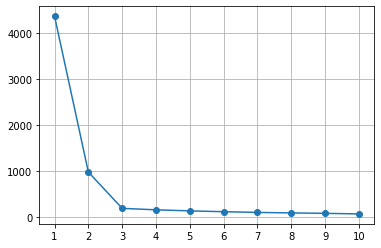

In [18]:
plt.plot(range(1, 11), result, '-o')
plt.xticks(range(1, 11))
plt.grid() # 대한 최적의 K값 확인 필요 

In [19]:
centers = K.cluster_centers_
centers # 군집의 중심점

array([[ 0.08921213, -5.46441742],
       [ 2.84050716,  4.85840422],
       [ 5.6183469 , -9.54288499]])

## K-means는 선형 경계를 가진다

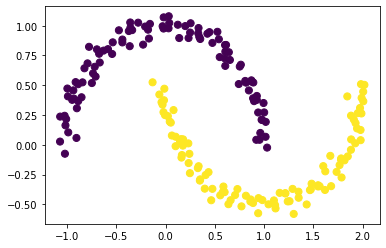

In [20]:
from sklearn.datasets import make_moons
x, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50)

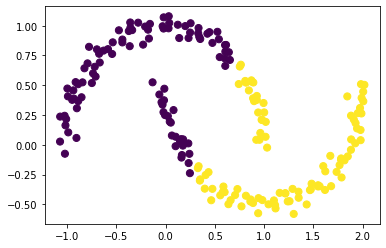

In [21]:
labels = KMeans(n_clusters=2, random_state=0).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50) # 오분류 발생

In [22]:
labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1], dtype=int32)

# DBSCAN 

- Density-Based 
- 밀도 기반의 군집화 방법
- 데이터가 모여있는 구간이 군집, 모여있지 않은 구간은 군집하지 않음

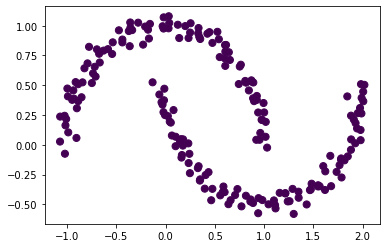

In [23]:
from sklearn.cluster import DBSCAN
labels = DBSCAN().fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50)

In [24]:
labels # 전부 0 이라는 군집으로 할당 -> epsilon 거리가 주어졌기 때문에 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
# DBSCAN은 표준화(정규화)를 취해주는게 좋다. 
# 단위를 표준화로 만들어서 0.5 차이를 한 틱으로 보겠다는 것. 
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)
x_scaled.mean(axis=0), x_scaled.std(axis=0)

(array([ 1.37667655e-16, -1.23789867e-16]), array([1., 1.]))

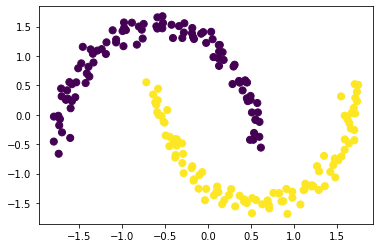

In [26]:
labels = DBSCAN().fit_predict(x_scaled)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, s=50)

In [27]:
labels

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import normalized_mutual_info_score

x, y = make_blobs(random_state=10)
labels = KMeans(n_clusters=3).fit_predict(x)

print('ACC: ', accuracy_score(y, labels))
print('ARI :', adjusted_rand_score(y, labels))
print('NMI :', normalized_mutual_info_score(y, labels))

ACC:  0.33
ARI : 1.0
NMI : 1.0


In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

k_range = range(2, 15)
inertias = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(iris['data'])
    inertias.append(model.inertia_)

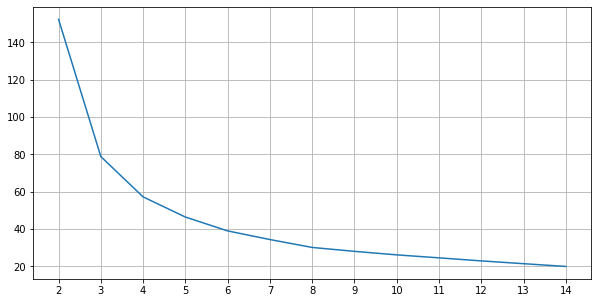

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias)
plt.xticks(k_range)
plt.grid()

In [31]:
from sklearn.metrics import silhouette_score#군집이 얼마나 잘 분리되었는가 평가척도(label X)

k_range = range(2, 15)
scores = []

for k in k_range:
    model = KMeans(n_clusters=k).fit(iris['data'])
    scores.append(silhouette_score(iris['data'], model.labels_))

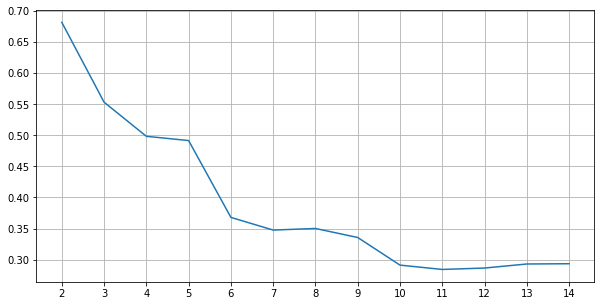

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores)
plt.xticks(k_range)
plt.grid()

In [33]:
labels = KMeans(n_clusters=2).fit_predict(iris['data'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Dimension Reduction (차원 축소)

- 고차원 데이터를 저차원으로 축소
    - 고차원 데이터를 시각화 하기 어려운 경우 (시각화 관점, 사람이 보기 편하게)
    - 데이터가 많은 경우 단순화 하기 위해 
    - Overfitting을 막기 위해 활용하기도 한다 
- 원본 데이터를 훼손한다. 참고용으로만 사용. 정보가 변경된다 

## PCA(주성분 분석)

- 선형적으로 고차원 데이터를 저차원 데이터로 분리 (원본 데이터의 분산 정보를 유지) -> 학습 데이터로 활용 
- 원본의 정보가 어느 정도 남아있다

## T-SNE 

- 고차원에서의 인접한 정도를 저차원에서도 유지
- 비선형적으로 고차원 데이터를 저차원으로 축소 -> 데이터 시각화를 위해 활용 

In [34]:
from sklearn.decomposition import PCA 

# n_components 1 보다 큰 정수이면 : 해당 숫자의 차원 수 (2)
# n_components 1 보다 작은 실수이면 : 분산값 기준으로 처리. 분산값이 일정 수 보다 크거나 작은 기준 
X_pca = PCA(n_components=2).fit_transform(iris['data'])

X_pca = PCA(n_components=0.9).fit_transform(iris['data'])

In [35]:
from sklearn.datasets import load_digits

digits = load_digits()

X_pca = PCA(n_components=2).fit_transform(digits['data'])
digits['data'].shape, X_pca.shape

((1797, 64), (1797, 2))

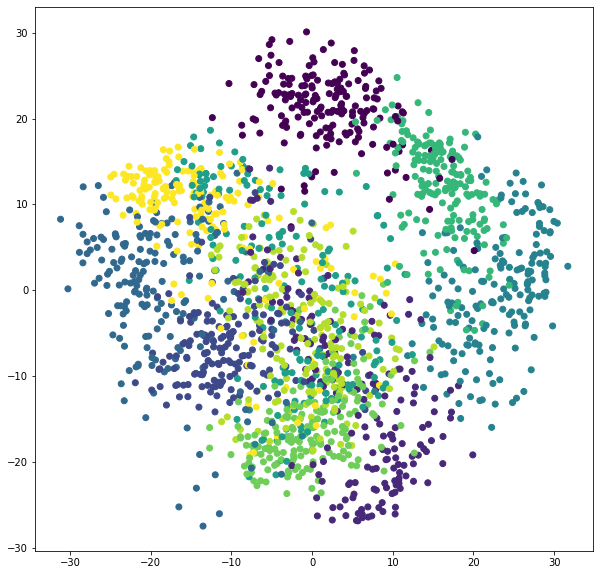

In [36]:
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=digits['target'])

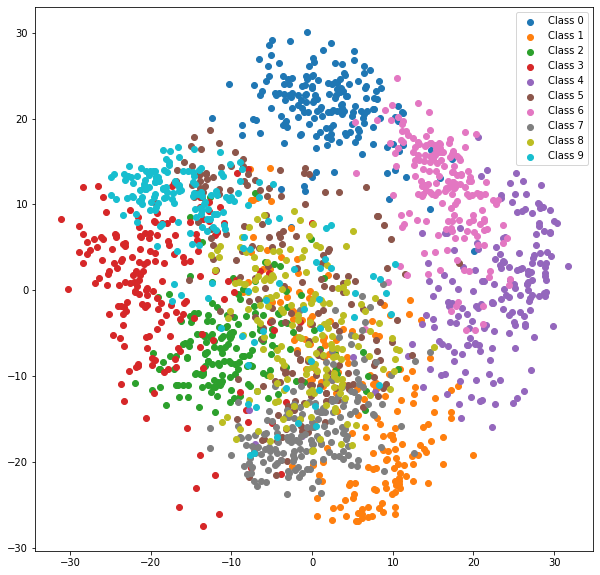

In [37]:
plt.figure(figsize=(10, 10))
for number in range(10):
    plt.scatter(X_pca[digits['target'] == number][:, 0],
                X_pca[digits['target'] == number][:, 1], 
                label=f'Class {number}')
plt.legend()
plt.show()


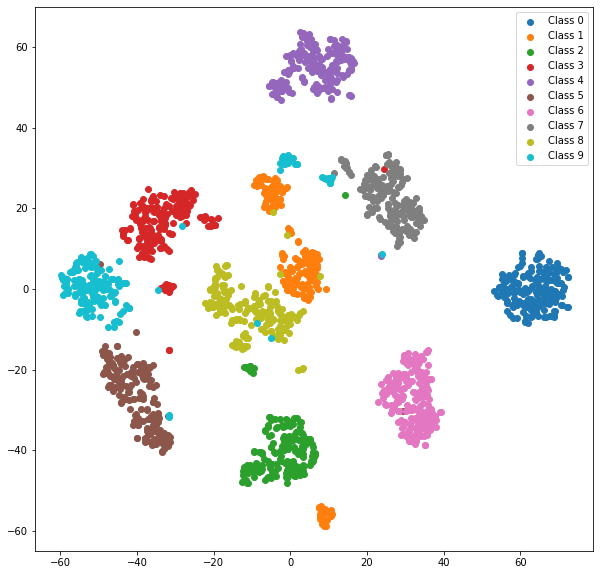

In [38]:
from sklearn.manifold import TSNE 

X_tsne = TSNE(n_components=2).fit_transform(digits['data'])

plt.figure(figsize=(10, 10))
for number in range(10):
    plt.scatter(X_tsne[digits['target'] == number][:, 0],
                X_tsne[digits['target'] == number][:, 1], 
                label=f'Class {number}')
plt.legend()
plt.show()

In [39]:
from sklearn.cluster import KMeans

K = KMeans(n_clusters=9).fit(digits["data"])

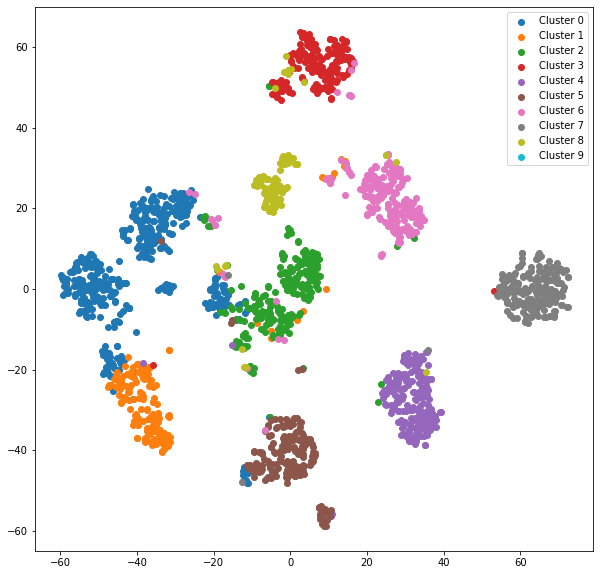

In [40]:
plt.figure(figsize=(10, 10))
for number in range(10):
    plt.scatter(X_tsne[K.labels_ == number][:, 0],
                X_tsne[K.labels_ == number][:, 1], 
                label=f'Cluster {number}')
plt.legend()
plt.show()

In [41]:
from sklearn.datasets import load_iris

iris = load_iris()

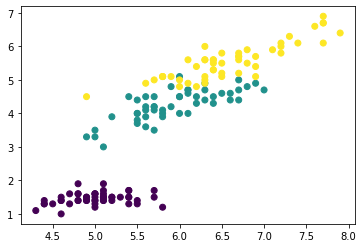

In [42]:
plt.scatter(iris['data'][:, 0], iris['data'][:, 2], c=iris['target'])